# Importing Libraries

In [440]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Question-1

## Loading raw accelerometer data

In [441]:
# Load the .npy files from the parent directory
X_train = np.load(os.path.join('..', 'Saved_Dataset', 'X_train.npy'))
y_train = np.load(os.path.join('..', 'Saved_Dataset', 'y_train.npy'))

X_test = np.load(os.path.join('..', 'Saved_Dataset', 'X_test.npy'))
y_test = np.load(os.path.join('..', 'Saved_Dataset', 'y_test.npy'))

## Approach-1: Reshaping X_train from shape (126,500,3) to (126,1500)

In [442]:
x_train=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
x_test=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

In [443]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [444]:
y_pred=dt.predict(x_test)

In [445]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))

Accuracy:  0.5370370370370371
Precision:  0.5225146198830409
Recall:  0.5225146198830409


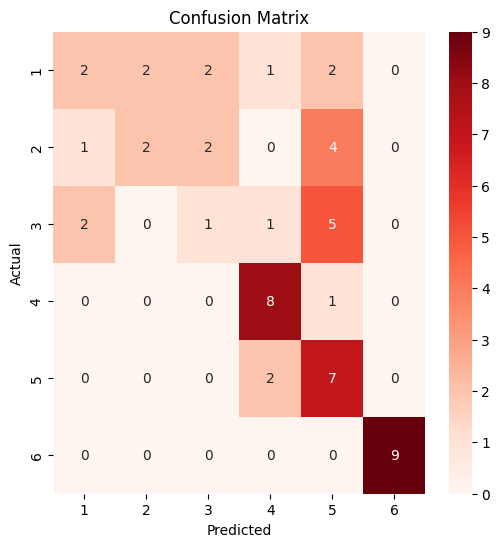

In [446]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Approach-2: Using Linear acceleration from X_train

In [447]:
linear_acc_train = np.sqrt(X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2)
linear_acc_test = np.sqrt(X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2)

In [448]:
dt=DecisionTreeClassifier()
dt.fit(linear_acc_train,y_train)

DecisionTreeClassifier()

In [449]:
y_pred=dt.predict(linear_acc_test)

In [450]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))

Accuracy:  0.6111111111111112
Precision:  0.6112554112554113
Recall:  0.6112554112554113


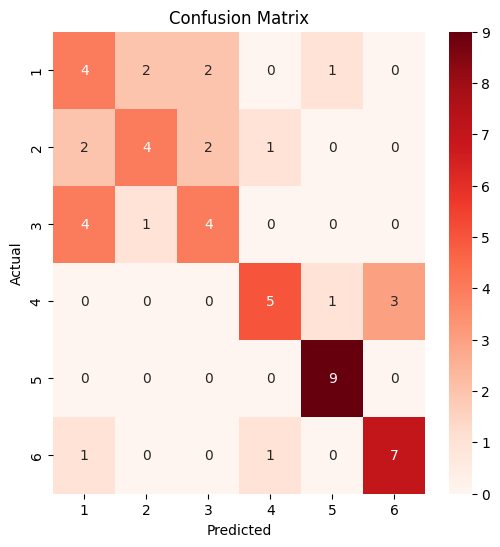

In [451]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-2

In [452]:
import tsfel
# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg,X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg,X_test, verbose=1,fs =50)

print("Shape of train data after performing feature creation using tsfel:",X_train_tsfel.shape)
print("Shape of test data after performing feature creation using tsfel:",X_test_tsfel.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of train data after performing feature creation using tsfel: (126, 1152)
Shape of test data after performing feature creation using tsfel: (54, 1152)


In [453]:
dt2=DecisionTreeClassifier()
dt2.fit(X_train_tsfel,y_train)

DecisionTreeClassifier()

In [454]:
y_tsfel_pred=dt2.predict(X_test_tsfel)

In [455]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_tsfel_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))

Accuracy:  0.8518518518518519
Precision:  0.8698038073038074
Recall:  0.8698038073038074


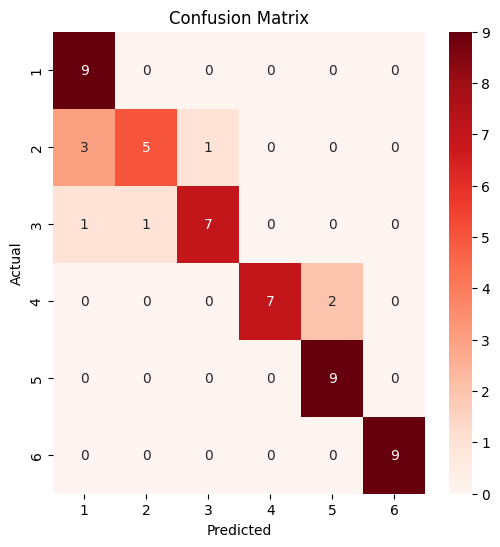

In [456]:
cm = confusion_matrix(y_test, y_tsfel_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-3

In [457]:
X_train = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/X_train.txt')
y_train = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/y_train.txt')

X_test = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/X_test.txt')
y_test = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/y_test.txt')

In [458]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [459]:
y_pred=dt.predict(X_test)

In [460]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))

Accuracy:  0.8547675602307431
Precision:  0.8527588297269225
Recall:  0.8527588297269225


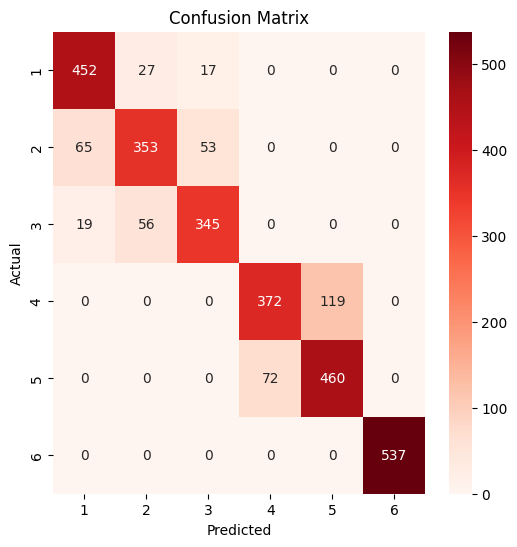

In [461]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()